# Generate and visualize a GTM model  (Generative Topographic Map) using numpy and sklearn.

In [1]:
# this is our module containing all functions to generate a GTM model (download uGTM.py from github)
import uGTM;
import numpy as np;
import time;
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets;
from sklearn.cluster import AgglomerativeClustering;
from sklearn.decomposition import PCA;
import mpl_toolkits.mplot3d.axes3d as p3;
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";

Two types of grids are generated to initialize the GTM model:
- the (square) grid of sample points (size = k*k)
- the (square) grid of RBF function centers (size = m*m)
Typically, m<k.

Two other parameters must be set to modulate the "smoothness" of the manifold:
- the regularization factor l 
- the RBF width factor s

For a total of four parameters: k, m, l, s.

The EM algorithm will optimize two "internal" parameters on its own:
- the inverse variance of the probability density function (betainv)
- the parameter (weight) matrix W


In [2]:
#parameters;
k=15;
m=4;
l=0.1;
s=1;

The data will be named "matT".
nMolecules is the number data points and nDimensions the dimensionality of the data.

Replace matT by your own data.

In [3]:
import csv
filenamedat = 'csvlist.dat'
filenamelbls = 'csvlist.lbls'
raw_data = open(filenamedat, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
matT = data
raw_labels = open(filenamelbls, 'rt')
reader = csv.reader(raw_labels, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('int')
label = data - 1

matT = sklearn.preprocessing.scale(matT,axis=0, with_mean=True, with_std=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(matT)
matT = scaler.transform(matT)

matT2,label2 = sklearn.datasets.make_swiss_roll(n_samples=1500); 

#st = time.time()
#ward = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(matT)
#elapsed_time = time.time() - st
#label = ward.labels_ 
#print("Elapsed time: %.2fs" % elapsed_time)
#print("Number of points: %i" % label.size)



In [4]:


#initialModel: gaussian mixture and swiss roll
initialModel = uGTM.initiliaze(matT,k,m,s,l)
initialModel2 = uGTM.initiliaze(matT2,k,m,s,l)


#optimizedModel: gaussian mixture and swiss roll
optimizedModel = uGTM.optimize(matT,initialModel,l,10)
optimizedModel2 = uGTM.optimize(matT2,initialModel2,l,10)






Iter  1  ErrorFunction (should go down):  1.26529392649
Iter  2  ErrorFunction (should go down):  0.926182090534
Iter  3  ErrorFunction (should go down):  0.876144483139
Iter  4  ErrorFunction (should go down):  0.852310643223
Iter  5  ErrorFunction (should go down):  0.836884034148
Iter  6  ErrorFunction (should go down):  0.825872651177
Iter  7  ErrorFunction (should go down):  0.817749754844
Iter  8  ErrorFunction (should go down):  0.811693564332
Iter  9  ErrorFunction (should go down):  0.8070983733
Iter  10  ErrorFunction (should go down):  0.803497553325
Iter  1  ErrorFunction (should go down):  10.4672097264
Iter  2  ErrorFunction (should go down):  9.91143510853
Iter  3  ErrorFunction (should go down):  9.87994568693
Iter  4  ErrorFunction (should go down):  9.87018539391
Iter  5  ErrorFunction (should go down):  9.86339529437
Iter  6  ErrorFunction (should go down):  9.85696097477
Iter  7  ErrorFunction (should go down):  9.85009127061
Iter  8  ErrorFunction (should go down):

# PLOT ORIGINAL VS PROJECTED DATA: mixture of gaussians

(-0.84107479184513778,
 1.0140692990762765,
 -1.0009110406132735,
 1.0150248549249823)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

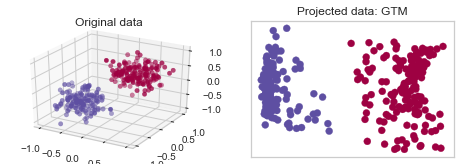

Computing LLE embedding
Done. Reconstruction error: 7.47183e-07


(-0.017639076744099414,
 0.097194805173482487,
 -0.24243665477331144,
 0.2640585506673605)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

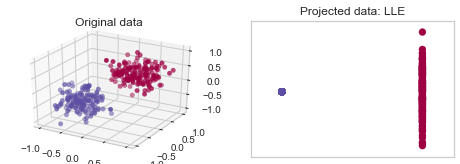

In [5]:
mm = optimizedModel.matMeans
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT[:, 0],matT[:, 1], matT[:, 2], c=label, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(mm[:, 0], mm[:, 1], c=label, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: GTM')
plt.show()

#compare with LLE

from sklearn import manifold

print("Computing LLE embedding")
matT_r, err = manifold.locally_linear_embedding(matT, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)


fig = plt.figure()

ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT[:, 0], matT[:, 1], matT[:, 2], c=label, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(matT_r[:, 0], matT_r[:, 1], c=label, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: LLE')
plt.show()

# PLOT ORIGINAL VS PROJECTED DATA: swiss roll (GTM doesn't unfold the swiss roll, LLE does (but not always))

(-0.6551897013629242,
 0.65977299605574824,
 -0.84291573635869332,
 0.88667375270990179)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

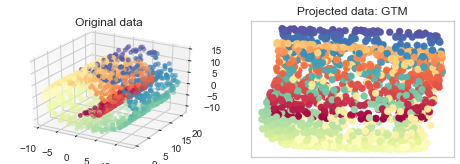

Computing LLE embedding
Done. Reconstruction error: 4.77374e-07


(-0.050785174918995299,
 0.1013623086902619,
 -0.095015551609914914,
 0.075291996079891441)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

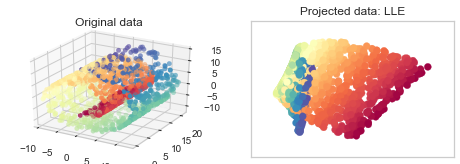

In [6]:
mm2 = optimizedModel2.matMeans
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT2[:, 0],matT2[:, 1], matT2[:, 2], c=label2, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(mm2[:, 0], mm2[:, 1], c=label2, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: GTM')
plt.show()


#compare with LLE

from sklearn import manifold
print("Computing LLE embedding")
matT2_r, err = manifold.locally_linear_embedding(matT2, n_neighbors=30,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

fig = plt.figure()

ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT2[:, 0], matT2[:, 1], matT2[:, 2], c=label2, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(matT2_r[:, 0], matT2_r[:, 1], c=label2, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: LLE')
plt.show()